# Clustering:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Load the data:

In [2]:
PATH= "../data/train_1.csv"

In [28]:
df= pd.read_csv(PATH)

In [29]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


What are the columns in the dataset?

In [31]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

First, drop rows with null values

In [32]:
df=df.dropna()
df.reset_index(inplace=True, drop=True)

In [33]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117272,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
117273,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
117274,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
117275,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


In [34]:
# Extracting the data for clustering (excluding the 'Page' column)
pages = df['Page']
data = df.iloc[:, 1:].values

In [35]:
data[0]

array([ 18.,  11.,   5.,  13.,  14.,   9.,   9.,  22.,  26.,  24.,  19.,
        10.,  14.,  15.,   8.,  16.,   8.,   8.,  16.,   7.,  11.,  10.,
        20.,  18.,  15.,  14.,  49.,  10.,  16.,  18.,   8.,   5.,   9.,
         7.,  13.,   9.,   7.,   4.,  11.,  10.,   5.,   9.,   9.,   9.,
         9.,  13.,   4.,  15.,  25.,   9.,   5.,   6.,  20.,   3.,  14.,
        46.,   5.,   5.,  13.,   4.,   9.,  10.,   9.,  11.,  11.,  11.,
         9.,  15.,   5.,  10.,   7.,   4.,   8.,   9.,  10.,   6.,  13.,
        16.,   6.,  24.,   9.,  11.,  12.,   8.,  14.,   6.,   6.,  11.,
        14.,   6.,  10.,  20.,   7.,  15.,   8.,  15.,   5.,   8.,   8.,
         5.,  11., 165.,  34.,   6.,  13.,   8.,   9.,  11.,  26.,  18.,
         3.,   5.,  12.,   6.,  16.,  19.,   9.,  10.,  11.,  11.,   7.,
         9.,  10.,  24.,   6.,   6.,   8.,  16.,  13.,  10.,  10.,   6.,
         5.,  20.,   6.,  47.,   9.,   9.,  12.,  11.,  17.,  15.,  14.,
        11.,  97.,  11.,  12.,  11.,  14.,  15.,  1

In [43]:
# Standardizing the data at row level (page level)
data_standardized = np.array([StandardScaler().fit_transform(row.reshape(-1, 1)).flatten() for row in data])

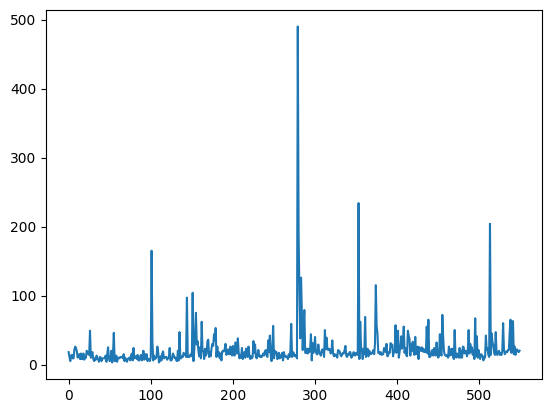

In [47]:
plt.plot(data[0])

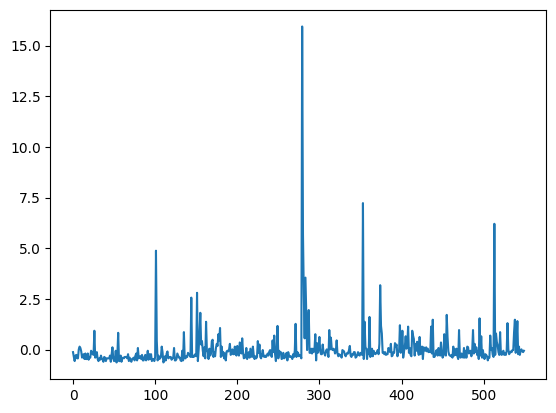

In [46]:
plt.plot(data_standardized[0])


In [56]:
# Function to calculate KMeans and plot inertia and silhouette scores
def plot_elbow(data, max_clusters, interval):
    inertias = []
    cluster_range = range(2, max_clusters + 1, interval)
    
    for k in cluster_range:
        print(f"Processing {k} clusters")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        inertia = kmeans.inertia_
        inertias.append(inertia)
    
    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertias, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot')
    plt.show()

Processing 2 clusters
Processing 3 clusters
Processing 4 clusters
Processing 5 clusters
Processing 6 clusters
Processing 7 clusters
Processing 8 clusters
Processing 9 clusters
Processing 10 clusters
Processing 11 clusters
Processing 12 clusters
Processing 13 clusters
Processing 14 clusters
Processing 15 clusters
Processing 16 clusters
Processing 17 clusters
Processing 18 clusters
Processing 19 clusters
Processing 20 clusters


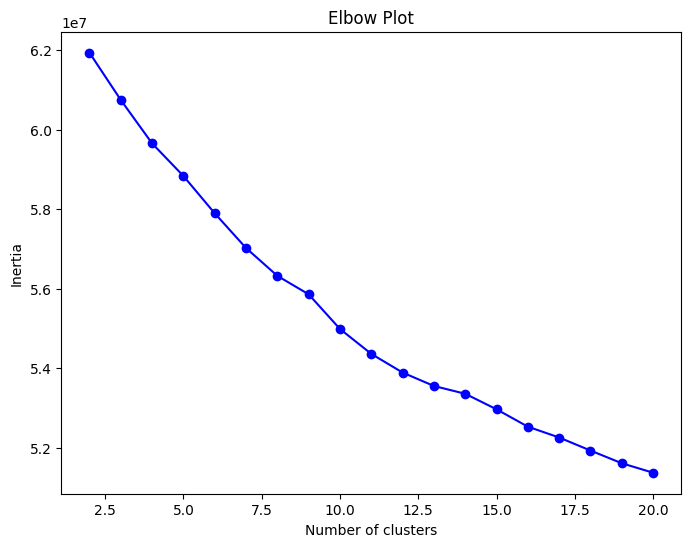

In [57]:
# Calling the function to plot the elbow plot
plot_elbow(data_standardized, 20, 1)

Processing 2 clusters
Processing 7 clusters
Processing 12 clusters
Processing 17 clusters
Processing 22 clusters
Processing 27 clusters
Processing 32 clusters
Processing 37 clusters
Processing 42 clusters
Processing 47 clusters
Processing 52 clusters
Processing 57 clusters
Processing 62 clusters
Processing 67 clusters
Processing 72 clusters
Processing 77 clusters
Processing 82 clusters
Processing 87 clusters
Processing 92 clusters
Processing 97 clusters


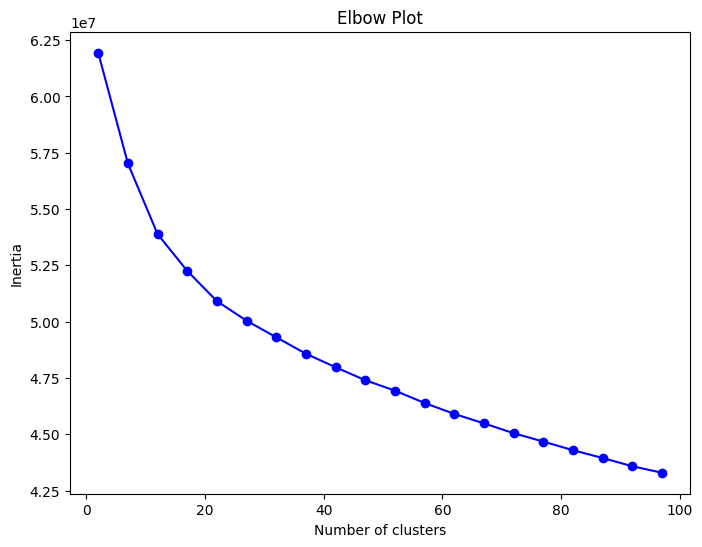

In [58]:
# Calling the function to plot the elbow plot
plot_elbow(data_standardized, 100, 5)

**We can see that the clustering of articles doen't work as we are not able to get the right set of clusters even when we make about 100 clusters.**